**Material Classification for clean energy applications** <br>
New materials need to be synthezied and characterized for improving existing clean energy applications. Your task is to predict the material classes based on thier given molecular properties. Your goal in this project to think like a data scientist and to achieve highest accuracy of classification.
You have been provided with two excel files. First file contains the molecular properties of the materials. Second file lists the classes of the material. Do data preprocessing if necessary at any step, always use a random seed wherever you can and describe your methods and results in detail. All plots should have labels and legends. 
Complete the tasks below (100 points):


1.   **Data Visualization and Unsupervised Classification** : Visualize the data and implement PCA and K-means to see if you can separate different classes. Report your findings. (10)
2.   **Classification of materials**: Implement Decision tree classifier, Random Forest (RF) and KNN classifier on the dataset and estimate the accuracies, F-1 score and confusion matrix. Report which classifier performs the best. Also use the features from the pca and k-means implementation in (1) to see if that improves the classification results. (20)
3.   **Hyper-parameter tuning**: Implement hyperparameter tuning on random forest and KNN algorithms. Report the best performing model and the respective hyperparameters with highest accuracy. (20)
4. **Most important features**: Not all features contribute to the classification accuracy equally. Estimate the order of best performing features. Repeat the classification task with including different number of features in your RF classifier and report how accuracy is changing (10)
5. **XGBoost** : XGBoost is a python ML library that uses optimized gradient boosted trees and has been really successful in completing many ML tasks. Implement XGBoost on the data. Perform hyper-parameter tuning and report the highest accuracy you acheive. (20)
6. **Neural Networks**: In the era of generative AI, which is powered by neural networks, lets see how neural nets perform compared to other ML classification models. Implement a neural network to predict the class (you can use keras, tensorflow or pytorch). Play with changing the number of layers and nodes per layers to see if you can increase the classification accuracy. (20)



In [7]:
#importing all the packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model

from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


In [8]:
features = pd.read_csv("features.csv")
features.head()

,deltaE_Hull(eV),Num_atoms,Band Presence,DeltaE(eV),Formation Energy (eV),Material Density(gm/cc),Unit Volume,symmetry group
0,0.098255,28,1,1.001032,-2.592542,3.326740,312.132638,16
1,0.064183,14,1,1.375044,-2.374531,2.967723,178.043993,31
2,0.060559,112,0,1.283468,-2.384009,2.998484,1407.014528,6
3,0.011077,28,1,3.432360,-2.732865,2.817023,299.600719,6
4,0.085077,28,1,3.173678,-2.792354,2.774474,342.162600,20


In [9]:
target = pd.read_csv("target.csv")
target.head()

,Type of Material
0,C
1,A
2,A
3,A
4,A


In [10]:
# Target is categorical and we need it numerical
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
target['Type of Material']= label_encoder.fit_transform(target['Type of Material']) 
  
target.head()

,Type of Material
0,2
1,0
2,0
3,0
4,0


In [11]:
target['Type of Material'].unique()

array([2, 0, 1])

In [12]:
features.shape

(339, 8)

In [13]:
# Creating a boolean series marking True for NaN values in the "Team" column
bool_series = pd.isnull(features)
 
# Counting missing values in the "Team" column
missing_values_count = bool_series.sum()
print(missing_values_count)

deltaE_Hull(eV)            0
Num_atoms                  0
Band Presence              0
DeltaE(eV)                 0
Formation Energy (eV)      0
Material Density(gm/cc)    0
Unit Volume                0
symmetry group             0
dtype: int64


1.Data Visualization and Unsupervised Classification : Visualize the data and implement PCA and K-means to see if you can separate different classes. Report your findings.

1.1 Data Visualisation

In [14]:
target.head()

,Type of Material
0,2
1,0
2,0
3,0
4,0


#Unsupervised Classification

#### Data Preparation

In [15]:
# Define X and y
X = features
y = target['Type of Material']

In [16]:
#Test and Train data
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)


In [17]:
#recheck
# Standard Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

1.2 PCA

In [18]:
#applying PCA on the training data 
from sklearn.decomposition import PCA 

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Text(0, 0.5, 'PC2')

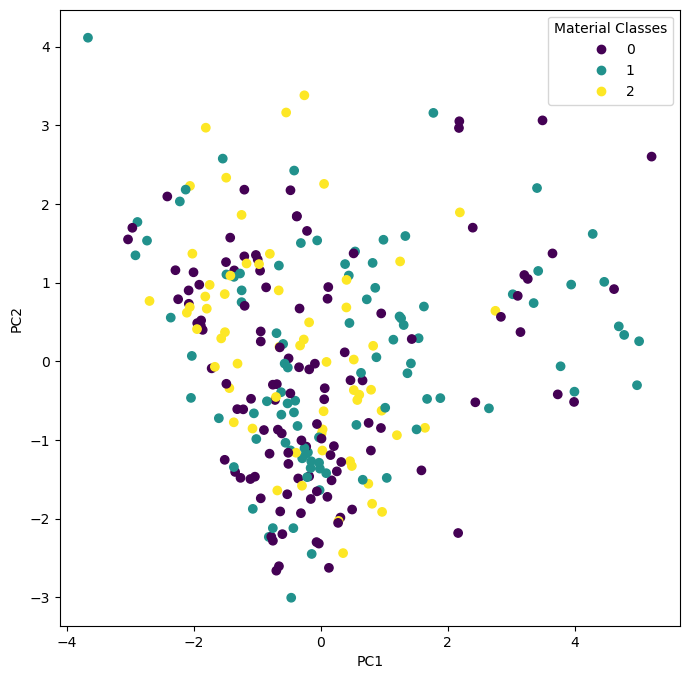

In [19]:
#recheck
plt.figure(figsize=(8,8))
scatter=plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c =y_train)
plt.legend(handles=scatter.legend_elements()[0], labels=['0','1','2'], title="Material Classes")
plt.xlabel("PC1")
plt.ylabel("PC2")

In [20]:
pca.explained_variance_ratio_

array([0.34332714, 0.22701258, 0.14348093, 0.10665821])

1.3 K-Means

In [21]:
#Scaling
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Text(0, 0.5, 'feature2')

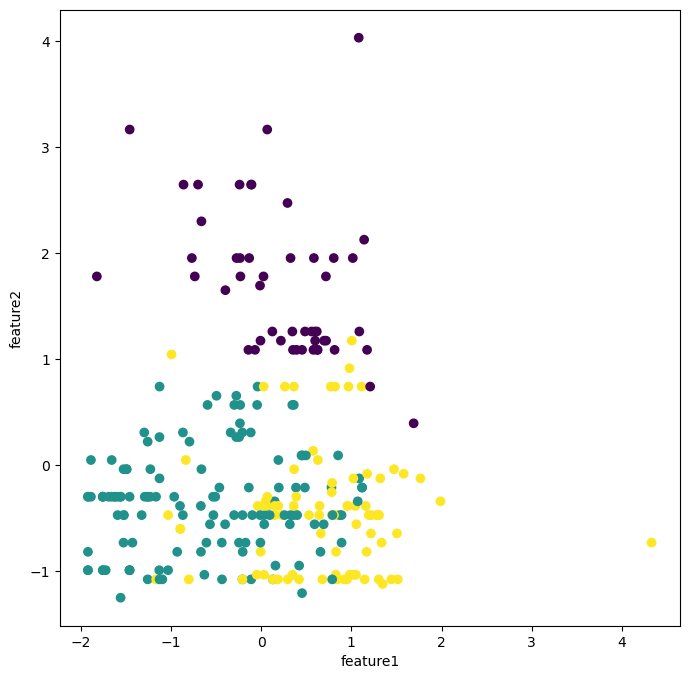

In [22]:
#using kmeans for feature engineering
X_train, X_test , y_train, y_test = train_test_split(X_scaled, y, test_size=0.20,random_state=42)
#Kmeans module
kmeans = KMeans(n_clusters =3,n_init=10, random_state=42)
kmeans.fit(X_train)
#Predict by kmeans
y_pred = kmeans.predict(X_train)
plt.figure(figsize=(8,8))
plt.scatter(X_train[:,0],X_train[:,1], c=y_pred)
plt.xlabel('feature1')
plt.ylabel('feature2')


2.   **Classification of materials**: Implement Decision tree classifier, Random Forest (RF) and KNN classifier on the dataset and estimate the accuracies, F-1 score and confusion matrix. Report which classifier performs the best. Also use the features from the pca and k-means implementation in (1) to see if that improves the classification results. (20)

2.1 Decision tree classifier on the dataset and estimate the accuracies, F-1 score and confusion matrix

In [23]:
# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)
# Predict y values
y_predictions = tree_clf.predict(X_test)

In [24]:
# CHECKING ACCURACY

In [25]:
# printing the test accuracy

print("training set score is : {:.3f}" .format(tree_clf.score(X_train,y_train)))
print("test set score is : {:.3f}" .format(tree_clf.score(X_test,y_test)))

training set score is : 0.963
test set score is : 0.897


In [26]:
#F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test,y_predictions, average='weighted')
recall = recall_score(y_test,y_predictions, average='weighted')
f1_score_value = f1_score(y_test,y_predictions, average='weighted')
print(f'F1_score:{f1_score_value}')
print(f'Precision:{precision},Recall:{recall}')

F1_score:0.8956312879543189
Precision:0.9142156862745099,Recall:0.8970588235294118


In [27]:
### Confusion Matrix
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

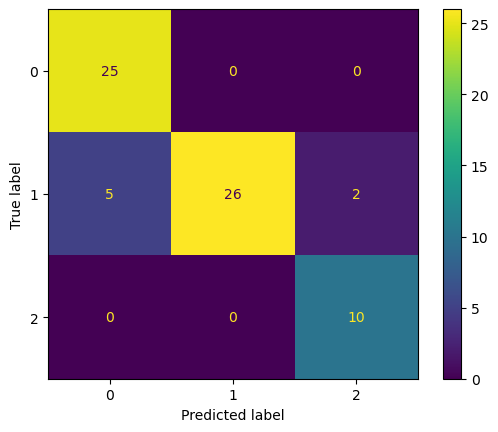

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predictions)

2.2 Random Forest (RF) and estimate the accuracies, F-1 score and confusion matrix

In [29]:

# Recheck
#Random Forest 
#feature importance
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=50, random_state=42)
rnd_clf.fit(X_train, y_train)
# Predict y values
y_predictions = rnd_clf.predict(X_test)

In [30]:
# printing the test accuracy

print("training set score is : {:.3f}" .format(rnd_clf.score(X_train,y_train)))
print("test set score is : {:.3f}" .format(rnd_clf.score(X_test,y_test)))

training set score is : 1.000
test set score is : 0.912


In [31]:
#F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test,y_predictions, average='weighted')
recall = recall_score(y_test,y_predictions, average='weighted')
f1_score_value = f1_score(y_test,y_predictions, average='weighted')
print(f'F1_score:{f1_score_value}')
print(f'Precision:{precision},Recall:{recall}')

F1_score:0.9110453272217978
Precision:0.9253565062388591,Recall:0.9117647058823529


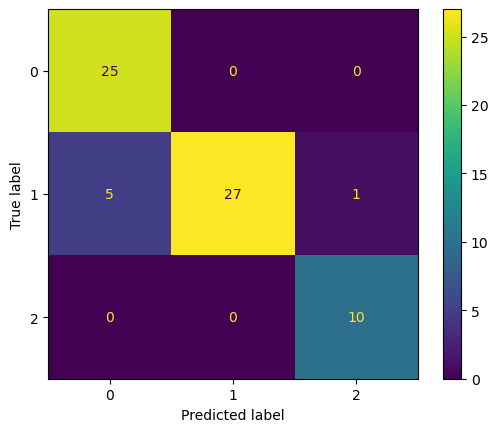

In [32]:
### Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_predictions)

2.3 KNN classifier on the dataset and estimate the accuracies, F-1 score and confusion matrix

In [33]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Model fitting
neigh.fit(X_train, y_train)
# Predict y values
y_predictions = neigh.predict(X_test)

In [34]:
# printing the test accuracy

print("training set score is : {:.3f}" .format(neigh.score(X_train,y_train)))
print("test set score is : {:.3f}" .format(neigh.score(X_test,y_test)))

training set score is : 0.823
test set score is : 0.647


In [35]:
#F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test,y_predictions, average='weighted')
recall = recall_score(y_test,y_predictions, average='weighted')
f1_score_value = f1_score(y_test,y_predictions, average='weighted')
print(f'F1_score:{f1_score_value}')
print(f'Precision:{precision},Recall:{recall}')

F1_score:0.6484517789016059
Precision:0.6501696832579186,Recall:0.6470588235294118


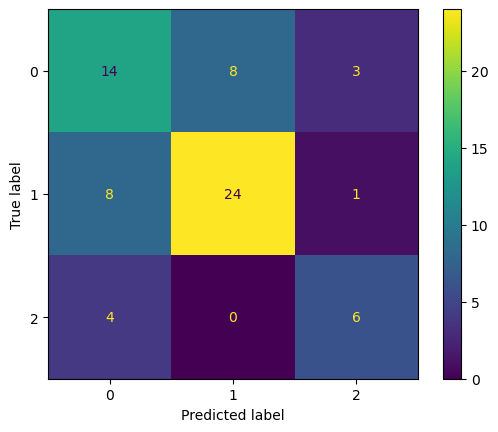

In [36]:
### Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_predictions)

2.4 which classifier performs the best?

Random tree Forest Classifier is the best

2.5 use the features from the pca and k-means implementation in (1) to see if that improves the classification results

3.   **Hyper-parameter tuning**: Implement hyperparameter tuning on random forest and KNN algorithms. Report the best performing model and the respective hyperparameters with highest accuracy. (20)

3.1 Implement hyperparameter tuning on random forest

Most important hyperparameters of Random Forest:

n_estimators = n of trees

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

In [37]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [25,50, 100],
    'max_features': [2, 3,4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5, 10, 15],
    'n_estimators': [25,50,100]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
#Fit
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=25; total time=   0.1s
[CV] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=25; total time=   0.1s
[CV] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=25; total time=   0.1s
[CV] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=25; total time=   0.1s
[CV] END b

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [25, 50, 100],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [25, 50, 100]},
             verbose=2)

In [38]:
#Finding the best parameter
best_model = grid_search.best_estimator_
best_parameters = grid_search.best_params_
best_f1 = grid_search.best_score_

print('The best model was:', best_model)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

The best model was: RandomForestClassifier(max_depth=25, max_features=4, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=25)
The best parameter values were: {'bootstrap': True, 'max_depth': 25, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 25}
The best f1-score was: 0.9594220594220594


In [39]:
#Hyperparameter tuning on Random Forest Classifier
best_rf = RandomForestClassifier(max_depth=100, max_features=4, min_samples_leaf=3,
                       min_samples_split=5)
best_rf.fit(X_train,y_train)
print(f'The Accuracy on tuned Random Forest Classifier model is {best_rf.score(X_test,y_test)}')

The Accuracy on tuned Random Forest Classifier model is 0.9264705882352942


3.2 Implement hyperparameter tuning on  KNN algorithms

We will use three hyperparamters- n-neighbors, weights and metric.

> n_neighbors: Decide the best k based on the values

> weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.

> metric: The distance metric to be used will calculating the similarity

In [40]:
# Create the parameter grid based on the results of random search 
grid_params = { 'n_neighbors' : [1,2,3,4,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

# Instantiate the grid search model
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

#Fit
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [41]:
#Finding the best parameter
best_model = g_res.best_estimator_
best_parameters = g_res.best_params_
best_f1 = g_res.best_score_

print('The best model was:', best_model)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

The best model was: KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')
The best parameter values were: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
The best f1-score was: 0.7084656084656085


In [42]:
#Hyperparameter tuning on KNeighborsClassifier Classifier
best_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')
best_knn.fit(X_train,y_train)
print(f'The Accuracy on tuned KNN model is {best_knn.score(X_test,y_test)}')

The Accuracy on tuned KNN model is 0.7647058823529411


3.3 Report the best performing model and the respective hyperparameters with highest accuracy


The best model among the two was: RandomForestClassifier(max_depth=100, max_features=4, min_samples_leaf=3,min_samples_split=5)

Highest Accuracy with it is 0.9264705882352942

4. **Most important features**: Not all features contribute to the classification accuracy equally. Estimate the order of best performing features. Repeat the classification task with including different number of features in your RF classifier and report how accuracy is changing (10)

4.1 Estimate the order of best performing features. 

In [43]:
#recheck
#feature importance
best_rf.fit(X, y)
for score, name in zip(best_rf.feature_importances_, X.columns):
    print(round(score, 2), name)

0.03 deltaE_Hull(eV)
0.07 Num_atoms
0.0 Band Presence 
0.06 DeltaE(eV)
0.04 Formation Energy (eV)
0.04 Material Density(gm/cc)
0.09 Unit Volume 
0.67 symmetry group


4.2 Repeat the classification task with including different number of features in your RF classifier,report how accuracy is changing 

In [ ]:

for i in range(1,len(list(features.columns))):
    best_rf1 = RandomForestClassifier(max_depth=100, max_features=i, min_samples_leaf=3, min_samples_split=5)
    best_rf1.fit(X_train,y_train)
    print(f'The Accuracy for {i} th feature is : {best_rf1.score(X_test,y_test)}')

5. **XGBoost** : XGBoost is a python ML library that uses optimized gradient boosted trees and has been really successful in completing many ML tasks. Implement XGBoost on the data. Perform hyper-parameter tuning and report the highest accuracy you acheive. (20)

5.1 Implement XGBoost on the data

# Install
!pip install xgboost

In [ ]:
# Import
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [47]:
#Creating an XGBoost classifier
model = xgb.XGBClassifier()

#Training the model on the training data
model.fit(X_train, y_train)

#Making predictions on the test set
predictions = model.predict(X_test)

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        10

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



5.2 Perform hyper-parameter tuning 

XGBoost hyperparameters 
Booster parameters:
1.learning_rate:
It is the step size shrinkage used in update to prevent overfitting.
After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.

2.max_depth [default=6]
The maximum depth of a tree, same as GBM.
It is used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
Increasing this value will make the model more complex and more likely to overfit.
We should be careful when setting large value of max_depth because XGBoost aggressively consumes memory when training a deep tree.

3.subsample [default=1]

It denotes the fraction of observations to be randomly samples for each tree.
Subsample ratio of the training instances.
Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. - This will prevent overfitting.
Subsampling will occur once in every boosting iteration.
Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.



In [58]:
# Define the hyperparameter grid

param_grid = {
    'max_depth': [3, 5, 7,8],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1],
    
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

#Finding the best parameter
best_model = grid_search.best_estimator_
best_parameters = grid_search.best_params_
best_f1 = grid_search.best_score_

print('The best model was:', best_model)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

The best model was: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
The best parameter values were: {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7}
The best f1-score was: 0.9926599326599327


5.3 report the highest accuracy you acheive

In [63]:
#Hyperparameter tuning on KNeighborsClassifier Classifier
best_xgb = xgb.XGBClassifier(learning_rate= 0.1, max_depth= 3, subsample= 0.7)
best_xgb.fit(X_train,y_train)
print(f'The Accuracy on tuned XGBoost model is {best_xgb.score(X_test,y_test)}')

The Accuracy on tuned XGBoost model is 1.0


6. **Neural Networks**: In the era of generative AI, which is powered by neural networks, lets see how neural nets perform compared to other ML classification models. Implement a neural network to predict the class (you can use keras, tensorflow or pytorch). Play with changing the number of layers and nodes per layers to see if you can increase the classification accuracy. (20)

6.1 Implement a neural network to predict the class (you can use keras, tensorflow or pytorch)

(271, 8)

In [19]:
#Importing the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [77]:
Neuralnetwork = pd.DataFrame(columns=['No', 'No of Hidden layers','No of nodes','Loss_train','accuracy_train','Loss_test','accuracy_test','No of epoch'])

In [78]:
# Model with no hidden only input and output layer
model = keras.Sequential([
    keras.layers.Dense(3, input_shape=(8,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
9/9 [==============================] - 0s 2ms/step - loss: 1.4664 - accuracy: 0.2620
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 1.4433 - accuracy: 0.2583
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 1.4217 - accuracy: 0.2731
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 1.4014 - accuracy: 0.2768
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 1.3805 - accuracy: 0.2878
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 1.3613 - accuracy: 0.2952
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 1.3437 - accuracy: 0.2989
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 1.3256 - accuracy: 0.3173
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 1.3078 - accuracy: 0.3247
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 1.2920 - accuracy: 0.3210


In [79]:
test= model.evaluate(X_test_scaled,y_test)
train = model.evaluate(X_train_scaled,y_train)

9/9 [==============================] - 0s 2ms/step - loss: 1.2822 - accuracy: 0.3247


In [80]:
Neuralnetwork.loc[0] = [1, 0,3,train[0],train[1],test[0],test[1],10]


In [81]:
# Model with 1 hidden only input and output layer and 10 nodes

hidden1model = keras.Sequential([
    
    keras.layers.Dense(10, input_shape=(8,), activation='relu'),
    keras.layers.Dense(3, activation='sigmoid')
])

hidden1model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hidden1model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
9/9 [==============================] - 0s 2ms/step - loss: 1.1289 - accuracy: 0.3875
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 1.1096 - accuracy: 0.3911
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0931 - accuracy: 0.4170
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0779 - accuracy: 0.4317
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0644 - accuracy: 0.4391
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0515 - accuracy: 0.4428
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0399 - accuracy: 0.4613
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0282 - accuracy: 0.4723
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0175 - accuracy: 0.4908
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0080 - accuracy: 0.5092


In [82]:
test=hidden1model.evaluate(X_test_scaled,y_test)
train = hidden1model.evaluate(X_train_scaled,y_train)

9/9 [==============================] - 0s 2ms/step - loss: 1.0021 - accuracy: 0.5166


In [83]:
#Adding to Data Frame
Neuralnetwork.loc[1] = [2, 1,10,train[0],train[1],test[0],test[1],10]
Neuralnetwork.head()

,No,No of Hidden layers,No of nodes,Loss_train,accuracy_train,Loss_test,accuracy_test,No of epoch
0,1.0,0.0,3.0,1.282247,0.324723,1.245124,0.455882,10.0
1,2.0,1.0,10.0,1.002126,0.516605,1.010585,0.500000,10.0


In [84]:
# Model with 1 hidden only input and output layer and 100 nodes

hidden1model100 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(8,), activation='relu'),
    keras.layers.Dense(3, activation='sigmoid')
])

hidden1model100.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hidden1model100.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
9/9 [==============================] - 1s 2ms/step - loss: 1.2066 - accuracy: 0.2325
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 1.1227 - accuracy: 0.3321
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0680 - accuracy: 0.4428
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0223 - accuracy: 0.5018
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 0.9904 - accuracy: 0.5572
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 0.9627 - accuracy: 0.5314
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 0.9396 - accuracy: 0.5314
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 0.9208 - accuracy: 0.5387
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 0.9055 - accuracy: 0.5498
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 0.8910 - accuracy: 0.5572


In [85]:
test =hidden1model100.evaluate(X_test_scaled,y_test)
train =hidden1model100.evaluate(X_train_scaled,y_train)

9/9 [==============================] - 0s 2ms/step - loss: 0.8820 - accuracy: 0.5609


In [86]:
#Adding to Data Frame
Neuralnetwork.loc[2] = [3, 1,100,train[0],train[1],test[0],test[1],10]
Neuralnetwork.head()

,No,No of Hidden layers,No of nodes,Loss_train,accuracy_train,Loss_test,accuracy_test,No of epoch
0,1.0,0.0,3.0,1.282247,0.324723,1.245124,0.455882,10.0
1,2.0,1.0,10.0,1.002126,0.516605,1.010585,0.500000,10.0
2,3.0,1.0,100.0,0.882009,0.560886,0.855192,0.617647,10.0


In [87]:
# Model with 2hidden, input and output layer and 10 nodes
hidden2model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(8,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='sigmoid')
])

hidden2model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hidden2model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
9/9 [==============================] - 1s 2ms/step - loss: 1.1056 - accuracy: 0.4317
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0926 - accuracy: 0.4576
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0816 - accuracy: 0.4723
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0720 - accuracy: 0.4834
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0629 - accuracy: 0.4945
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 1.0537 - accuracy: 0.5277
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0452 - accuracy: 0.5314
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0374 - accuracy: 0.5240
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0296 - accuracy: 0.5277
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0228 - accuracy: 0.5240


In [88]:
test = hidden2model.evaluate(X_test_scaled,y_test)
train = hidden2model.evaluate(X_train_scaled,y_train)

9/9 [==============================] - 0s 2ms/step - loss: 1.0175 - accuracy: 0.5240


In [89]:
#Adding to Data Frame
Neuralnetwork.loc[3] = [4, 2,10,train[0],train[1],test[0],test[1],10]
Neuralnetwork.head()

,No,No of Hidden layers,No of nodes,Loss_train,accuracy_train,Loss_test,accuracy_test,No of epoch
0,1.0,0.0,3.0,1.282247,0.324723,1.245124,0.455882,10.0
1,2.0,1.0,10.0,1.002126,0.516605,1.010585,0.500000,10.0
2,3.0,1.0,100.0,0.882009,0.560886,0.855192,0.617647,10.0
3,4.0,2.0,10.0,1.017454,0.523985,1.003256,0.485294,10.0


In [90]:
# Model with 2hidden, input and output layer and 100 nodes
hidden2model100 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(8,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(3, activation='sigmoid')
])

hidden2model100.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hidden2model100.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
9/9 [==============================] - 1s 3ms/step - loss: 1.1005 - accuracy: 0.3247
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 0.9973 - accuracy: 0.5129
Epoch 3/10
9/9 [==============================] - 0s 3ms/step - loss: 0.9392 - accuracy: 0.5572
Epoch 4/10
9/9 [==============================] - 0s 3ms/step - loss: 0.8954 - accuracy: 0.5830
Epoch 5/10
9/9 [==============================] - 0s 3ms/step - loss: 0.8534 - accuracy: 0.6089
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 0.8202 - accuracy: 0.6236
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 0.7952 - accuracy: 0.6421
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 0.7675 - accuracy: 0.6531
Epoch 9/10
9/9 [==============================] - 0s 3ms/step - loss: 0.7445 - accuracy: 0.6716
Epoch 10/10
9/9 [==============================] - 0s 3ms/step - loss: 0.7206 - accuracy: 0.6716


In [91]:
test = hidden2model100.evaluate(X_test_scaled,y_test)
train = hidden2model100.evaluate(X_train_scaled,y_train)

9/9 [==============================] - 0s 2ms/step - loss: 0.7041 - accuracy: 0.6937


In [92]:
#Adding to Data Frame
Neuralnetwork.loc[4] = [5, 2,100,train[0],train[1],test[0],test[1],10]
Neuralnetwork.head()

,No,No of Hidden layers,No of nodes,Loss_train,accuracy_train,Loss_test,accuracy_test,No of epoch
0,1.0,0.0,3.0,1.282247,0.324723,1.245124,0.455882,10.0
1,2.0,1.0,10.0,1.002126,0.516605,1.010585,0.500000,10.0
2,3.0,1.0,100.0,0.882009,0.560886,0.855192,0.617647,10.0
3,4.0,2.0,10.0,1.017454,0.523985,1.003256,0.485294,10.0
4,5.0,2.0,100.0,0.704108,0.693727,0.726108,0.647059,10.0


In [93]:
# Model with 5 hidden, input and output layer and 10 nodes
hidden5model = keras.Sequential([
    #Input Layer
    keras.layers.Dense(10, input_shape=(8,), activation='relu'),
    #Hidden Layer
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    #Output layer
    keras.layers.Dense(3, activation='sigmoid')
])

hidden5model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hidden5model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
9/9 [==============================] - 1s 2ms/step - loss: 1.0995 - accuracy: 0.3137
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0926 - accuracy: 0.3690
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0860 - accuracy: 0.4096
Epoch 4/10
9/9 [==============================] - 0s 3ms/step - loss: 1.0790 - accuracy: 0.4576
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0720 - accuracy: 0.5018
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0638 - accuracy: 0.4871
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0552 - accuracy: 0.5055
Epoch 8/10
9/9 [==============================] - 0s 3ms/step - loss: 1.0450 - accuracy: 0.5129
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0351 - accuracy: 0.5277
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 1.0228 - accuracy: 0.5461


In [102]:
test = hidden5model.evaluate(X_test_scaled,y_test)
train = hidden5model.evaluate(X_train_scaled,y_train)

9/9 [==============================] - 0s 2ms/step - loss: 1.0151 - accuracy: 0.5351


In [103]:
#Adding to Data Frame
Neuralnetwork.loc[5] = [6, 5,10,train[0],train[1],test[0],test[1],10]
Neuralnetwork.head(6)

,No,No of Hidden layers,No of nodes,Loss_train,accuracy_train,Loss_test,accuracy_test,No of epoch
0,1.0,0.0,3.0,1.282247,0.324723,1.245124,0.455882,10.0
1,2.0,1.0,10.0,1.002126,0.516605,1.010585,0.500000,10.0
2,3.0,1.0,100.0,0.882009,0.560886,0.855192,0.617647,10.0
3,4.0,2.0,10.0,1.017454,0.523985,1.003256,0.485294,10.0
4,5.0,2.0,100.0,0.704108,0.693727,0.726108,0.647059,10.0
5,6.0,5.0,10.0,1.015062,0.535055,0.998002,0.485294,10.0


In [95]:
# Model with 5 hidden, input and output layer and 100 nodes
hidden5model100 = keras.Sequential([
    #Input Layer
    keras.layers.Dense(100, input_shape=(8,), activation='relu'),
    #Hidden Layer
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    #Output layer
    keras.layers.Dense(3, activation='sigmoid')
])

hidden5model100.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hidden5model100.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
9/9 [==============================] - 1s 3ms/step - loss: 1.0510 - accuracy: 0.4945
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 0.9474 - accuracy: 0.5609
Epoch 3/10
9/9 [==============================] - 0s 3ms/step - loss: 0.8487 - accuracy: 0.5572
Epoch 4/10
9/9 [==============================] - 0s 3ms/step - loss: 0.7706 - accuracy: 0.6310
Epoch 5/10
9/9 [==============================] - 0s 3ms/step - loss: 0.7081 - accuracy: 0.6753
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.7306
Epoch 7/10
9/9 [==============================] - 0s 3ms/step - loss: 0.5929 - accuracy: 0.7749
Epoch 8/10
9/9 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7970
Epoch 9/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4528 - accuracy: 0.8044
Epoch 10/10
9/9 [==============================] - 0s 3ms/step - loss: 0.4106 - accuracy: 0.8376


In [96]:
hidden5model100.evaluate(X_test_scaled,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.5155 - accuracy: 0.7500


[0.5155197381973267, 0.75]

In [100]:
 test = hidden5model100.evaluate(X_test_scaled,y_test)
train = hidden5model100.evaluate(X_train_scaled,y_train)

9/9 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.8672


In [104]:
#Adding to Data Frame
Neuralnetwork.loc[6] = [7, 5,100,train[0],train[1],test[0],test[1],10]
Neuralnetwork.head(7)

,No,No of Hidden layers,No of nodes,Loss_train,accuracy_train,Loss_test,accuracy_test,No of epoch
0,1.0,0.0,3.0,1.282247,0.324723,1.245124,0.455882,10.0
1,2.0,1.0,10.0,1.002126,0.516605,1.010585,0.500000,10.0
2,3.0,1.0,100.0,0.882009,0.560886,0.855192,0.617647,10.0
3,4.0,2.0,10.0,1.017454,0.523985,1.003256,0.485294,10.0
4,5.0,2.0,100.0,0.704108,0.693727,0.726108,0.647059,10.0
5,6.0,5.0,10.0,1.015062,0.535055,0.998002,0.485294,10.0
6,7.0,5.0,100.0,1.015062,0.535055,0.998002,0.485294,10.0


Increasing node increases the accuracy but there is no direct impact of increase in hidden layers to accuracy.

In [117]:
#The neural network model
def simple_model():
    # assemble the structure
    model = Sequential()
    model.add(Dense(6, input_dim= len(list(features.columns)), kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
    return model

In [122]:
# initialize the andom seed as this is used to generate
# the starting weights
np.random.seed(42)
# create the NN framework
NNmodel = simple_model()
NNmodel.fit(X_train, y_train, validation_split=0.33, epochs=150, 
        batch_size=50, verbose=0)

In [121]:
NNmodel.evaluate(X_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.4537 - accuracy: 0.5441


[0.45372721552848816, 0.5441176295280457]

6.2 changing the number of layers and nodes per layers to see if you can increase the classification accuracy

In [65]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu',  input_dim= len(list(features.columns))))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100


/tmp/ipykernel_69/239625899.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
2023-12-06 00:33:31.897147: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


6/6 [==============================] - 1s 3ms/step - loss: 0.6923 - accuracy: 0.3722
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.3500
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.3500
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.3500
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.3500
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.3500
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.3500
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.3500
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.3500
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.3500
Epoch 11/100
6/6 [=======================

In [ ]:


**Cool things you can try doing if you want that won't be graded** <br>
1. Remove outliers to see if that improves the classification
2. Try out data visualization techniques that were not covered in the course
3. See if you implement transfer learning and hyperparameter tuning for your neural network model